# EXTRACTION DU FACTEUR SYSTEMIQUE

## Import et nettoyage des données

In [2]:
import sys
import pandas
sys.path.insert(0, '..')
import importlib

# Si vous modifiez le fichier preprocessing, n'oubliez pas d'activer la ligne suivante
# importlib.reload(src.preprocessing)

from src.preprocessing import prepare_corporate_ratings, annualize_and_fill_ratings, create_quarterly_rating_transitions, truncating_data

DATA_PATH = "data_rating_corporate.xlsx"

df_initial = prepare_corporate_ratings(DATA_PATH)


# 2. Appeler la fonction de traitement ANNUEL
# Le résultat est stocké dans l'objet 'data_rating_yearly'
data_rating_yearly = annualize_and_fill_ratings(df_initial)

# 3. Appeler la fonction de traitement TRIMESTRIEL
# Le résultat est stocké dans l'objet 'data_rating_quarterly'
data_rating_quarterly = create_quarterly_rating_transitions(df_initial)


✅ Données chargées et préparées avec succès.


c:\Users\werid\Desktop\Cours 3A\pfe\PFE\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT-main\notebooks\..\src\preprocessing.py:94: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fill_gaps)                         # Appliquer la fonction de réindexation


In [6]:
data_rating_quarterly

,year_quarter,obligor_name,rating_agency_name,rating,rating_action_date,legal_entity_identifier,year_month,year,pays,nace,next_rating
0,2022-07-01,"06 ENVIRONMENTAL, LLC",Egan-Jones Ratings Company,B,2022-07-22,NaN,2022-07-01,2022.0,NaN,RU,B
5,2021-07-01,"11065220 Canada, Inc.",Fitch Ratings,B,2021-08-18,549300ETSKJL315VDV79,2021-08-01,2021.0,NaN,RU,D
11,2019-04-01,"18 Fremont Street Acquisition, LLC",Moody's Investors Service,B,2019-06-06,5493000QK0X0K188BR60,2019-06-01,2019.0,US,RU,C
12,2019-07-01,"18 Fremont Street Acquisition, LLC",Moody's Investors Service,B,2019-07-01,5493000QK0X0K188BR60,2019-07-01,2019.0,US,RU,C
13,2019-10-01,"18 Fremont Street Acquisition, LLC",Moody's Investors Service,B,2019-10-01,5493000QK0X0K188BR60,2019-10-01,2019.0,US,RU,C
...,...,...,...,...,...,...,...,...,...,...,...
225616,2012-10-01,tw telecom inc.,Standard & Poor's Ratings Services,BB,2012-10-01,NaN,2012-10-01,2012.0,US,JZ,BB
225617,2013-01-01,tw telecom inc.,Standard & Poor's Ratings Services,BB,2013-01-01,NaN,2013-01-01,2012.0,US,JZ,BB
225618,2013-04-01,tw telecom inc.,Standard & Poor's Ratings Services,BB,2013-04-01,NaN,2013-04-01,2012.0,US,JZ,BB
225619,2013-07-01,tw telecom inc.,Standard & Poor's Ratings Services,BB,2013-08-12,NaN,2013-08-01,2013.0,US,JZ,BB


In [5]:
data_rating_quarterly.to_csv("sectors_quater.csv", index=False)

In [17]:
# Si vous modifiez le fichier 'preprocessing', n'oubliez pas d'activer la ligne suivante
# importlib.reload(src.preprocessing)
from src.preprocessing import SectorPortfolio

all_sectors = SectorPortfolio.create_from_processed_data(
    name="all",
    sectors=['RU', 'JZ', 'OQ', 'C5', 'KZ', 'HZ', 'GZ', 'MN', 'C1', 'FZ', 'C3','LZ', 'CH', 'C4', 'BZ', 'IZ', 'AZ', 'C2'], # Liste de tous les secteurs
    annual_data=data_rating_yearly,
    quarterly_data=data_rating_quarterly
)

industrie_portfolio = SectorPortfolio.create_from_processed_data(
    name="industrie",
    sectors=['C1','C2','C3','C4','C5','CH'], # Secteurs industriels spécifiques
    annual_data=data_rating_yearly,
    quarterly_data=data_rating_quarterly
)

print("✅ Portefeuille créé :", industrie_portfolio.name)
print("📊 Secteurs inclus :", industrie_portfolio.sectors)

services_portfolio = SectorPortfolio.create_from_processed_data(
    name="services",
    sectors=['GZ','IZ','HZ'], 
    annual_data=data_rating_yearly,
    quarterly_data=data_rating_quarterly
)

print("✅ Portefeuille créé :", services_portfolio.name)
print("📊 Secteurs inclus :", services_portfolio.sectors)

services_pro_portfolio = SectorPortfolio.create_from_processed_data(
    name="services_pro",
    sectors=['MN'], 
    annual_data=data_rating_yearly,
    quarterly_data=data_rating_quarterly
)

print("✅ Portefeuille créé :", services_pro_portfolio.name)
print("📊 Secteurs inclus :", services_pro_portfolio.sectors)

public_portfolio = SectorPortfolio.create_from_processed_data(
    name="public",
    sectors=['OQ', 'RU'], 
    annual_data=data_rating_yearly,
    quarterly_data=data_rating_quarterly

)

print("✅ Portefeuille créé :", public_portfolio.name)
print("📊 Secteurs inclus :", public_portfolio.sectors)
finance_portfolio = SectorPortfolio.create_from_processed_data(
    name="finance",
    sectors=['KZ'], 
    annual_data=data_rating_yearly,
    quarterly_data=data_rating_quarterly

)

print("✅ Portefeuille créé :", finance_portfolio.name)
print("📊 Secteurs inclus :", finance_portfolio.sectors)

info_com_portfolio = SectorPortfolio.create_from_processed_data(
    name="info_com",
    sectors=['JZ'], 
    annual_data=data_rating_yearly,
    quarterly_data=data_rating_quarterly

)
print("✅ Portefeuille créé :", info_com_portfolio.name)
print("📊 Secteurs inclus :", info_com_portfolio.sectors)

construction_immo_portfolio = SectorPortfolio.create_from_processed_data(
    name="construction_immo",
    sectors=['FZ','LZ'], 
    annual_data=data_rating_yearly,
    quarterly_data=data_rating_quarterly

)

print("✅ Portefeuille créé :", construction_immo_portfolio.name)
print("📊 Secteurs inclus :", construction_immo_portfolio.sectors)

extraction_primaire_portfolio = SectorPortfolio.create_from_processed_data(
    name="extraction_primaire",
    sectors=['AZ', 'BZ'], 
    annual_data=data_rating_yearly,
    quarterly_data=data_rating_quarterly

)

print("✅ Portefeuille créé :", extraction_primaire_portfolio.name)
print("📊 Secteurs inclus :", extraction_primaire_portfolio.sectors)



✅ Portefeuille créé : industrie
📊 Secteurs inclus : ['C1', 'C2', 'C3', 'C4', 'C5', 'CH']
✅ Portefeuille créé : services
📊 Secteurs inclus : ['GZ', 'IZ', 'HZ']
✅ Portefeuille créé : services_pro
📊 Secteurs inclus : ['MN']
✅ Portefeuille créé : public
📊 Secteurs inclus : ['OQ', 'RU']
✅ Portefeuille créé : finance
📊 Secteurs inclus : ['KZ']
✅ Portefeuille créé : info_com
📊 Secteurs inclus : ['JZ']
✅ Portefeuille créé : construction_immo
📊 Secteurs inclus : ['FZ', 'LZ']
✅ Portefeuille créé : extraction_primaire
📊 Secteurs inclus : ['AZ', 'BZ']


In [19]:
all_sectors.quarterly_data

,year_quarter,obligor_name,rating_agency_name,rating,rating_action_date,legal_entity_identifier,year_month,year,pays,nace,next_rating
0,2022-07-01,"06 ENVIRONMENTAL, LLC",Egan-Jones Ratings Company,B,2022-07-22,NaN,2022-07-01,2022.0,NaN,RU,B
5,2021-07-01,"11065220 Canada, Inc.",Fitch Ratings,B,2021-08-18,549300ETSKJL315VDV79,2021-08-01,2021.0,NaN,RU,D
11,2019-04-01,"18 Fremont Street Acquisition, LLC",Moody's Investors Service,B,2019-06-06,5493000QK0X0K188BR60,2019-06-01,2019.0,US,RU,C
12,2019-07-01,"18 Fremont Street Acquisition, LLC",Moody's Investors Service,B,2019-07-01,5493000QK0X0K188BR60,2019-07-01,2019.0,US,RU,C
13,2019-10-01,"18 Fremont Street Acquisition, LLC",Moody's Investors Service,B,2019-10-01,5493000QK0X0K188BR60,2019-10-01,2019.0,US,RU,C
...,...,...,...,...,...,...,...,...,...,...,...
225616,2012-10-01,tw telecom inc.,Standard & Poor's Ratings Services,BB,2012-10-01,NaN,2012-10-01,2012.0,US,JZ,BB
225617,2013-01-01,tw telecom inc.,Standard & Poor's Ratings Services,BB,2013-01-01,NaN,2013-01-01,2012.0,US,JZ,BB
225618,2013-04-01,tw telecom inc.,Standard & Poor's Ratings Services,BB,2013-04-01,NaN,2013-04-01,2012.0,US,JZ,BB
225619,2013-07-01,tw telecom inc.,Standard & Poor's Ratings Services,BB,2013-08-12,NaN,2013-08-01,2013.0,US,JZ,BB


In [6]:
sectors =[industrie_portfolio, services_portfolio, services_pro_portfolio, public_portfolio, finance_portfolio, info_com_portfolio, construction_immo_portfolio, extraction_primaire_portfolio]

In [7]:
extraction_primaire_portfolio.annual_data

,year,rating_agency_name,rating,rating_action_date,legal_entity_identifier,obligor_name,year_month,pays,nace,next_rating
374,2017,Moody's Investors Service,BB,2017-07-13,QF02R89VEIOROM77J447,ABM Investama Tbk (P.T.),2017-07-01,ID,BZ,BB
375,2018,Moody's Investors Service,BB,2017-07-13,QF02R89VEIOROM77J447,ABM Investama Tbk (P.T.),2017-07-01,ID,BZ,B
379,2011,Egan-Jones Ratings Company,B,2011-07-08,MZ7PUO5D10MMXGVVPY36,ABRAXAS PETROLEUM CORPORATION,2011-07-01,US,BZ,B
380,2012,Egan-Jones Ratings Company,B,2012-10-16,MZ7PUO5D10MMXGVVPY36,ABRAXAS PETROLEUM CORPORATION,2012-10-01,US,BZ,B
381,2013,Egan-Jones Ratings Company,B,2013-11-20,MZ7PUO5D10MMXGVVPY36,ABRAXAS PETROLEUM CORPORATION,2013-11-01,US,BZ,B
...,...,...,...,...,...,...,...,...,...,...
66411,2017,Fitch Ratings,A,2013-06-11,31570020000000003378,"eustream, a.s.",2013-06-01,US,BZ,A
66412,2018,Fitch Ratings,A,2013-06-11,31570020000000003378,"eustream, a.s.",2013-06-01,US,BZ,A
66413,2019,Fitch Ratings,A,2013-06-11,31570020000000003378,"eustream, a.s.",2013-06-01,US,BZ,A
66414,2020,Fitch Ratings,A,2013-06-11,31570020000000003378,"eustream, a.s.",2013-06-01,US,BZ,A


In [11]:
# Si vous modifiez le fichier 'merton_homo', n'oubliez pas d'activer la ligne suivante
# importlib.reload(src.merton_homo)
from src.creditmetrics import CreditMetrics

credi_all_portfolio = CreditMetrics(finance_portfolio)
zt=credi_all_portfolio.compute()

zt

Zt values:
2010-07-01   -0.113729
2010-10-01    0.865167
2011-01-01    1.182152
2011-04-01    1.001547
2011-07-01    0.093760
2011-10-01   -0.582303
2012-01-01   -0.634776
2012-04-01    0.219300
2012-07-01    0.027697
2012-10-01    0.401578
2013-01-01   -0.069836
2013-04-01   -0.096481
2013-07-01    0.924171
2013-10-01    0.727494
2014-01-01    0.802684
2014-04-01    0.424726
2014-07-01   -0.005408
2014-10-01   -0.198245
2015-01-01   -0.172365
2015-04-01   -0.519077
2015-07-01   -0.445036
2015-10-01   -0.009234
2016-01-01    0.034046
2016-04-01    0.239146
2016-07-01   -0.222951
2016-10-01   -0.752658
2017-01-01   -0.620566
2017-04-01   -0.348269
2017-07-01   -0.162695
2017-10-01    0.110625
2018-01-01    0.341075
2018-04-01    0.280355
2018-07-01    0.359940
2018-10-01   -0.471350
2019-01-01   -0.962522
2019-04-01   -1.927952
2019-07-01   -1.788685
2019-10-01   -1.663545
2020-01-01   -1.105886
2020-04-01    0.092922
2020-07-01    0.734780
2020-10-01    1.435027
2021-01-01    1.531983


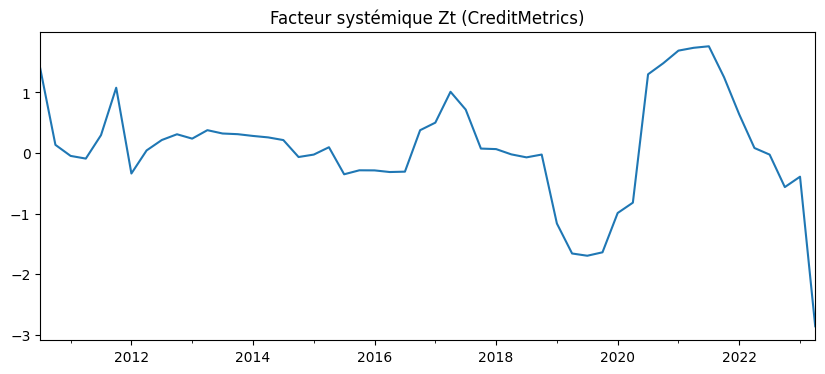

In [9]:
zt.plotting_zt()

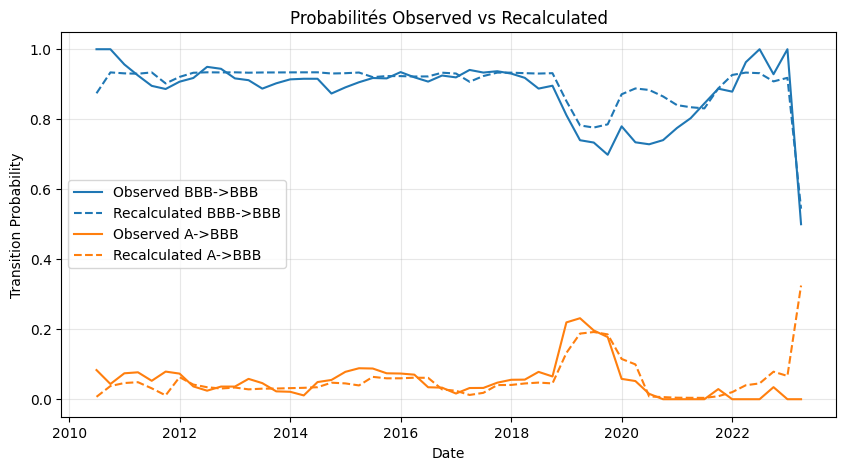

In [10]:
zt.plot_transitions([['BBB','BBB'],['A','BBB']])

In [ ]:
import pandas as pd
zt.values
Zt1 = pd.DataFrame(zt.values, columns=["Zt"])

In [ ]:
Zt1

,Zt
2010-07-01,-0.113729
2010-10-01,0.865167
2011-01-01,1.182152
2011-04-01,1.001547
2011-07-01,0.093760
2011-10-01,-0.582303
2012-01-01,-0.634776
2012-04-01,0.219300
2012-07-01,0.027697
2012-10-01,0.401578


In [13]:
import pandas as pd

sectors = [
    industrie_portfolio,
    services_portfolio,
    services_pro_portfolio,
    public_portfolio,
    finance_portfolio,
    info_com_portfolio,
    construction_immo_portfolio,
    extraction_primaire_portfolio
]

sector_names = [
    "industrie",
    "services",
    "services_pro",
    "public",
    "finance",
    "info_com",
    "construction_immo",
    "extraction_primaire"
]

all_zt = {}

for sector, name in zip(sectors, sector_names):
    cm = CreditMetrics(sector)
    zt = cm.compute()  # zt est une Series (index = dates, valeurs = Zt)

    df = pd.DataFrame(zt.values, columns=["Zt"])  # transforme en DataFrame avec une colonne "Zt"
    df.to_csv(f"Z_{name}.csv", index=True)  # export CSV (index = dates)
    all_zt[name] = zt.values.rename(name)

# Fusion par la date (index)
Zt_all_sectors = pd.concat(all_zt.values(), axis=1)

# Optionnel : trier par date
Zt_all_sectors = Zt_all_sectors.sort_index()

# Export
Zt_all_sectors.to_csv("Zt_all_sectors.csv")

In [ ]:
all_zt = {}  # contiendra toutes les séries Zt

for sector, name in zip(sectors, sector_names):
    cm = CreditMetrics(sector)
    zt = cm.compute()  # objet Zt

    # zt.values est une Series indexée par date
    all_zt[name] = zt.values.rename(name)

# Fusion par la date (index)
Zt_all_sectors = pd.concat(all_zt.values(), axis=1)

# Optionnel : trier par date
Zt_all_sectors = Zt_all_sectors.sort_index()

# Export
Zt_all_sectors.to_csv("Zt_all_sectors.csv")

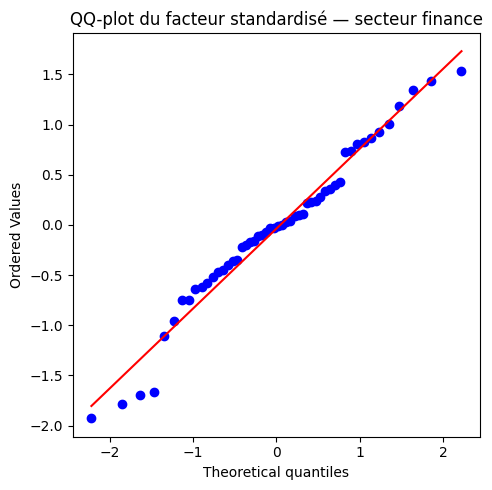

In [ ]:
from scipy.stats import probplot
from matplotlib import pyplot as plt

plt.figure(figsize=(5,5))
probplot(
    Zt1[Zt1["Zt"].notna()]["Zt"],  # On prend uniquement les valeurs non-NA de Zt
    dist="norm",
    plot=plt
)
plt.title(f"QQ-plot du facteur standardisé — secteur finance")
plt.tight_layout()
plt.show()
